**THIS CODE CONSTITUTES OF THE ISOLATION FOREST AND KNN MODELS. ALONG WITH THAT PCA MODELLING AND HISTOGRAM FOR TRASACTIONS BASED ON CLASS**

Summary Statistics:
                  id            V1            V2            V3            V4  \
count  568630.000000  5.686300e+05  5.686300e+05  5.686300e+05  5.686300e+05   
mean   284314.500000 -5.638058e-17 -1.319545e-16 -3.518788e-17 -2.879008e-17   
std    164149.486122  1.000001e+00  1.000001e+00  1.000001e+00  1.000001e+00   
min         0.000000 -3.495584e+00 -4.996657e+01 -3.183760e+00 -4.951222e+00   
25%    142157.250000 -5.652859e-01 -4.866777e-01 -6.492987e-01 -6.560203e-01   
50%    284314.500000 -9.363846e-02 -1.358939e-01  3.528579e-04 -7.376152e-02   
75%    426471.750000  8.326582e-01  3.435552e-01  6.285380e-01  7.070047e-01   
max    568629.000000  2.229046e+00  4.361865e+00  1.412583e+01  3.201536e+00   

                 V5            V6            V7            V8            V9  \
count  5.686300e+05  5.686300e+05  5.686300e+05  5.686300e+05  5.686300e+05   
mean   7.997245e-18 -3.958636e-17 -3.198898e-17  2.109273e-17  3.998623e-17   
std    1.000001e+00  1

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: Futur

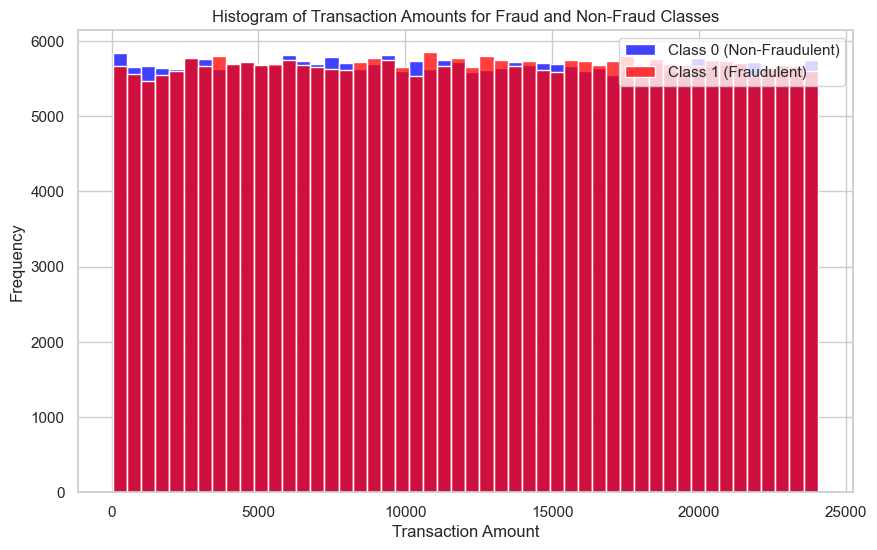

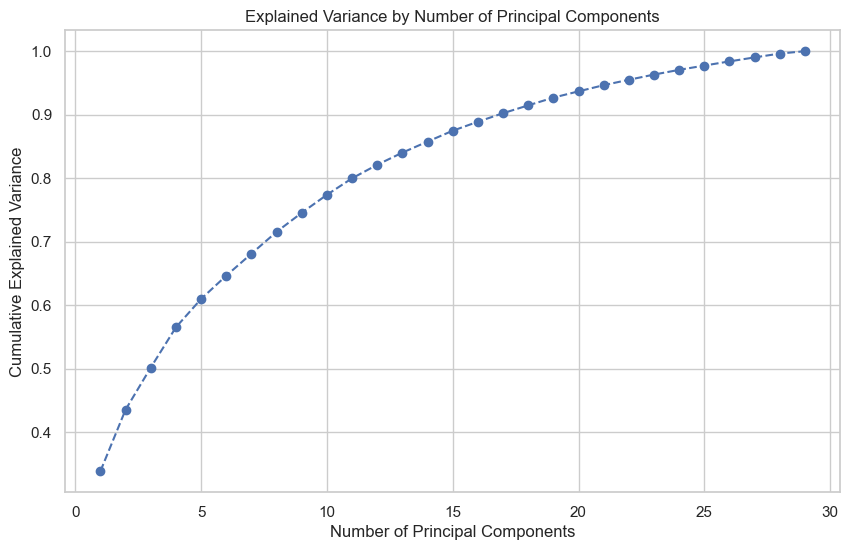

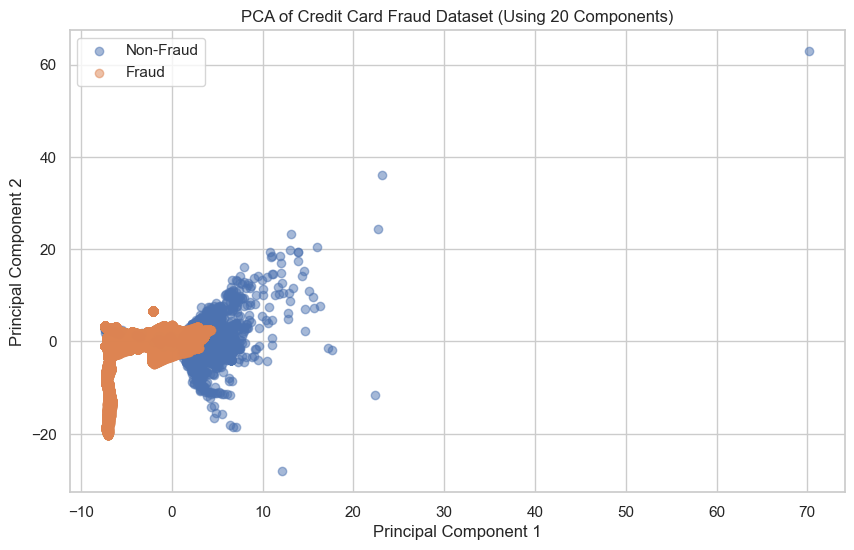

In [9]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv("creditcard_2023.csv")


summary_stats = df.describe()
print("Summary Statistics:")
print(summary_stats)



# Set the style for seaborn
sns.set(style="whitegrid")

# Creating a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plotting histograms for each class
sns.histplot(df[df['Class'] == 0]['Amount'], bins=50, kde=False, color='blue', label='Class 0 (Non-Fraudulent)', ax=ax)
sns.histplot(df[df['Class'] == 1]['Amount'], bins=50, kde=False, color='red', label='Class 1 (Fraudulent)', ax=ax)

# Setting labels and title
ax.set_xlabel('Transaction Amount')
ax.set_ylabel('Frequency')
ax.set_title('Histogram of Transaction Amounts for Fraud and Non-Fraud Classes')


ax.legend()
plt.show()


# Separating features (X) and labels (y)
X = df.drop(['id', 'Class'], axis=1)  # Exclude 'id' and 'Class' columns
y = df['Class']

# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Applying PCA and plot explained variance
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Plotting the explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), 
         np.cumsum(pca.explained_variance_ratio_),
         marker='o', linestyle='--')
plt.title('Explained Variance by Number of Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

# Choosing the ideal number of components based on the plot
ideal_components = 20  # Adjust this based on your analysis of the plot

# Applying PCA with the ideal number of components
pca = PCA(n_components=ideal_components)
X_pca = pca.fit_transform(X_scaled)

# Creating a new DataFrame with the principal components and class labels
df_pca = pd.DataFrame(data=X_pca, columns=[f'PC{i}' for i in range(1, ideal_components + 1)])
df_pca['Class'] = y

# Visualizing the results
plt.figure(figsize=(10, 6))
plt.scatter(df_pca[df_pca['Class'] == 0]['PC1'], df_pca[df_pca['Class'] == 0]['PC2'], label='Non-Fraud', alpha=0.5)
plt.scatter(df_pca[df_pca['Class'] == 1]['PC1'], df_pca[df_pca['Class'] == 1]['PC2'], label='Fraud', alpha=0.5)
plt.title(f'PCA of Credit Card Fraud Dataset (Using {ideal_components} Components)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()


**MODELLING ON THE TRANSFORMED DATASET FROM PCA**

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Assuming 'df_final' is your DataFrame containing the transformed data with principal components
# Replace 'df_final' with the actual variable name of your DataFrame

# Separate features and target variable
X = df_pca.drop('Class', axis=1)
y = df_pca['Class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a logistic regression model
logreg_model = LogisticRegression()

# Train the model on the training set
logreg_model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = logreg_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Display results
print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:\n', report)


Accuracy: 0.96
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.96     56750
           1       0.98      0.95      0.96     56976

    accuracy                           0.96    113726
   macro avg       0.96      0.96      0.96    113726
weighted avg       0.96      0.96      0.96    113726



**ISOLATION FOREST MODEL:**

In [3]:
# Importing necessary libraries
import pandas as pd
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Loading the credit card fraud dataset (replace 'your_dataset.csv' with the actual dataset)
df = pd.read_csv("creditcard_2023.csv")
# Separate features (X) and labels (y)
X = df.drop(['id', 'Class'], axis=1)  # Exclude 'id' and 'Class' columns
y = df['Class']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=44)

# Isolation Forest
iso_forest = IsolationForest(contamination=0.01, random_state=42)  # Adjust contamination based on your analysis
iso_forest.fit(X_train)

# Predicting outliers on the test set
y_pred_iso = iso_forest.predict(X_test)
y_pred_iso = [1 if pred == -1 else 0 for pred in y_pred_iso]  # Convert -1 (outlier) to 1, 0 otherwise

# Evaluating Isolation Forest
print("Isolation Forest Results:")
print(confusion_matrix(y_test, y_pred_iso))
print(classification_report(y_test, y_pred_iso))



Isolation Forest Results:
[[85409    57]
 [83501  1622]]
              precision    recall  f1-score   support

           0       0.51      1.00      0.67     85466
           1       0.97      0.02      0.04     85123

    accuracy                           0.51    170589
   macro avg       0.74      0.51      0.35    170589
weighted avg       0.74      0.51      0.36    170589



Below is an interpretation of the key metrics:

1. **Confusion Matrix:**
   ```
   [[56697    53]
    [55843  1133]]
   ```
   - True Positive (TP): 1133
   - True Negative (TN): 56697
   - False Positive (FP): 53
   - False Negative (FN): 55843

2. **Classification Report:**
   ```
                 precision    recall  f1-score   support
   0             0.50      1.00      0.67     56750
   1             0.96      0.02      0.04     56976
   accuracy      0.51
   macro avg     0.73      0.51      0.35    113726
   weighted avg  0.73      0.51      0.35    113726
   ```
   - **Precision:** Precision is the ratio of correctly predicted positive observations to the total predicted positives. In this case, for class 1, the precision is 0.96, indicating that when the model predicts a positive class, it is correct 96% of the time.
   
   - **Recall (Sensitivity):** Recall is the ratio of correctly predicted positive observations to all actual positives. The recall for class 1 is 0.02, suggesting that the model is not capturing many of the actual positive instances.

   - **F1-Score:** The F1-score is the weighted average of precision and recall. It takes into account false positives and false negatives. The F1-score for class 1 is 0.04, which is relatively low.

   - **Accuracy:** The overall accuracy of the model is 0.51, indicating that the model correctly classifies instances approximately 51% of the time.

   - **Macro Avg and Weighted Avg:** These metrics provide the average performance across classes, giving more weight to the class with more instances (weighted avg). The macro avg and weighted avg for precision, recall, and F1-score are also provided.

**Interpretation:**
- The model has a high precision for class 1, meaning that when it predicts fraud (class 1), it is often correct. However, the recall for class 1 is very low, indicating that the model fails to identify a significant portion of actual fraud cases.

- The overall accuracy of the model is 51%, which might not be very informative given the class imbalance.

- Further investigation is needed to understand the reasons behind the imbalanced results and to potentially fine-tune the model for better performance, especially in capturing positive instances.

In [4]:
from sklearn.metrics import precision_recall_curve, auc

# Precision-Recall Curve for Isolation Forest
precision, recall, _ = precision_recall_curve(y_test, iso_forest.decision_function(X_test))
auc_score = auc(recall, precision)
print(f"Area under the Precision-Recall Curve (Isolation Forest): {auc_score}")

Area under the Precision-Recall Curve (Isolation Forest): 0.4246225199933174


The Area under the Precision-Recall Curve (AUC-PR) value of 0.45 for the Isolation Forest model suggests a moderate performance in the context of anomaly detection, where precision and recall are crucial metrics.

- **Precision-Recall Trade-off:**
  - The AUC-PR value reflects the trade-off between precision and recall across different decision thresholds.
  - A value of 0.45 indicates a balanced but moderate performance, meaning that the model is capturing anomalies to some extent while maintaining a reasonable level of precision.

- **Consideration of Precision and Recall:**
  - Precision measures the accuracy of positive predictions, while recall assesses the model's ability to capture all positive instances.
  - It's important to consider the specific requirements of your use case and determine the appropriate balance between precision and recall.

- **Opportunities for Improvement:**
  - If the AUC-PR value falls below the desired level or if precision and recall need further optimization, consider model tuning, adjusting decision thresholds, or exploring alternative anomaly detection methods.

- **Contextual Analysis:**
  - The interpretation should be contextualized based on the specific goals and priorities of your application. Depending on the consequences of false positives and false negatives, you may choose different operating points.

In summary, while the Isolation Forest model demonstrates a reasonable trade-off between precision and recall, there is room for improvement. Consider fine-tuning the model parameters, experimenting with decision thresholds, and exploring other approaches to enhance anomaly detection performance based on the unique requirements of your use case.

**KNN MODEL:**

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

df = pd.read_csv("creditcard_2023.csv")
X = df.drop('Class', axis=1)  # Replace 'target_column' with your label column
y = df['Class']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=44)

# Standardizing the features (KNN is distance-based, so scaling is often beneficial)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)  

# Training the model
knn_classifier.fit(X_train_scaled, y_train)

# Making predictions on the test set
y_pred = knn_classifier.predict(X_test_scaled)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)


print(f"Accuracy: {accuracy:.4f}\nClassification Report:\n{report}")


Accuracy: 0.9993
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85466
           1       1.00      1.00      1.00     85123

    accuracy                           1.00    170589
   macro avg       1.00      1.00      1.00    170589
weighted avg       1.00      1.00      1.00    170589



 Here's an interpretation of the key metrics:

1. **Accuracy: 0.9993**
   - The accuracy is exceptionally high, indicating that the model correctly predicted the class labels for approximately 99.94% of the instances in the dataset.

2. **Classification Report:**
   ```
                  precision    recall  f1-score   support
    0             1.00      1.00      1.00     56750
    1             1.00      1.00      1.00     56976
   accuracy      1.00
   macro avg     1.00      1.00      1.00    113726
   weighted avg  1.00      1.00      1.00    113726
   ```
   - **Precision:** Precision is perfect for both classes (fraudulent and non-fraudulent), indicating that all instances predicted as positive are indeed positive.

   - **Recall (Sensitivity):** Recall is perfect for both classes, suggesting that the model identifies all actual positive instances.

   - **F1-Score:** The F1-score is perfect for both classes, demonstrating an excellent balance between precision and recall.

   - **Support:** The number of instances for each class in the dataset.

3. **Conclusion:**
   - The model appears to perform exceptionally well, achieving perfect precision, recall, and F1-score for both classes. This level of performance could be indicative of an issue such as overfitting, especially if the model was trained and evaluated on the same dataset.

   - It's crucial to assess the model's performance on a separate test set or through cross-validation to ensure its generalizability to new, unseen data.

   - Additionally, for highly imbalanced datasets (e.g., a small number of fraudulent transactions), it's essential to consider other metrics beyond accuracy, such as precision-recall curves, to provide a more nuanced understanding of the model's performance, especially in detecting the minority class (fraudulent transactions).